# Mouse Virus Detection

This project aims to predict the presence of a virus in different mice

## Steps

* Libraries Importing I
* Data Importing 
* Data Wrangling
* Data Visualization
* Libraries Importing II
* Model Creation and Parameters Tuning
* Prediction

# Libraries Importing I

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mouse_df = pd.read_csv("mouse_viral_study.csv")

In [4]:
mouse_df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


# Data Wrangling

In [5]:
mouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [6]:
mouse_df.duplicated().sum()

0

# Data Visualization

<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

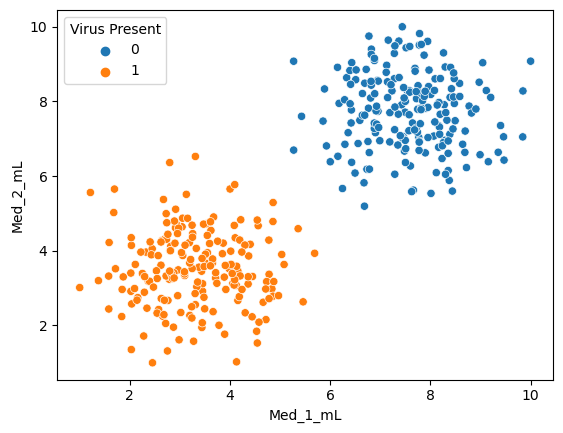

In [7]:
sns.scatterplot(data=mouse_df, x="Med_1_mL", y="Med_2_mL", hue="Virus Present")

<AxesSubplot:xlabel='Virus Present', ylabel='count'>

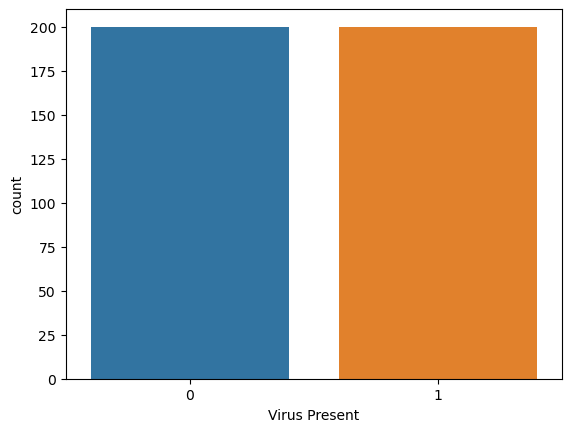

In [9]:
sns.countplot(data=mouse_df, x="Virus Present")

The dataset seems balanced

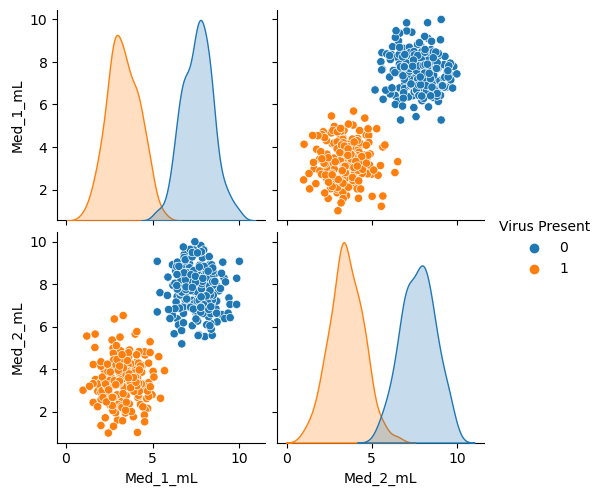

In [11]:
sns.pairplot(data=mouse_df, hue="Virus Present")

The mean is seperated so it should be easy to get a very high accuracy.

# Libraries Importing II

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [13]:
log_model = LogisticRegression()
lda_model = LinearDiscriminantAnalysis()
qda_model = QuadraticDiscriminantAnalysis()
knn_model = KNeighborsClassifier()
svm_model = SVC()
scaler = StandardScaler()

In [14]:
log_operation = [('scaler',scaler),('log_model',log_model)]
lda_operation = [('scaler',scaler),('lda_model',lda_model)]
qda_operation = [('scaler',scaler),('log_model',qda_model)]
knn_operation = [('scaler',scaler),('knn_model',knn_model)]
svm_operation = [('scaler',scaler),('svm_model',svm_model)]

In [15]:
log_pipe = Pipeline(log_operation)
lda_pipe = Pipeline(lda_operation)
qda_pipe = Pipeline(qda_operation)
knn_pipe = Pipeline(knn_operation)
svm_pipe = Pipeline(svm_operation)

In [16]:
log_param_grid = {
    'log_model__penalty': ['elasticnet'],
    'log_model__C': np.logspace(0,1,100),
    'log_model__solver': ['saga'],
    'log_model__l1_ratio': np.linspace(0,1,100),
    'log_model__max_iter': [10000]
}

lda_param_grid = {
    'lda_model__solver': ['svd', 'lsqr'],
    'lda_model__shrinkage': ['auto']
    
}

qda_param_grid = {
       
}

knn_param_grid = {
    'knn_model__n_neighbors': list(range(1,20))
    
}

svm_param_grid = {
    'svm_model__C': np.logspace(0,1,100),
    'svm_model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svm_model__degree': np.linspace(0,10),
    'svm_model__gamma': ['auto', 'scale'],
    'svm_model__max_iter': [10000]
}

In [20]:
log_cv = GridSearchCV(log_pipe, param_grid=log_param_grid, verbose=False)
lda_cv = GridSearchCV(lda_pipe, param_grid=lda_param_grid, verbose=False)
qda_cv = GridSearchCV(qda_pipe, param_grid=qda_param_grid, verbose=False)
knn_cv = GridSearchCV(knn_pipe, param_grid=knn_param_grid, verbose=False)
svm_cv = GridSearchCV(svm_pipe, param_grid=svm_param_grid, verbose=False)

In [21]:
X = mouse_df.drop('Virus Present', axis=1)
y = mouse_df['Virus Present']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [25]:
log_cv.fit(X_train,y_train)
lda_cv.fit(X_train,y_train)
qda_cv.fit(X_train,y_train)
knn_cv.fit(X_train,y_train)
svm_cv.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm_model', SVC())]),
             param_grid={'svm_model__C': array([ 1.        ,  1.02353102,  1.04761575,  1.07226722,  1.09749877,
        1.12332403,  1.149757  ,  1.17681195,  1.20450354,  1.23284674,
        1.26185688,  1.29154967,  1.32194115,  1.35304777,  1.38488637,
        1.41747416,  1.45082878,  1.48496826,  1.51991108,  1.55567614,
        1.59228279,  1.6297...
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ]),
                         'svm_model__gamma': ['auto', 'scale'],
                         'svm_model__kernel': ['linear', 'poly', 'rbf',
          

In [26]:
log_cv.best_params_

{'log_model__C': 1.0,
 'log_model__l1_ratio': 0.0,
 'log_model__max_iter': 10000,
 'log_model__penalty': 'elasticnet',
 'log_model__solver': 'saga'}

In [27]:
lda_cv.best_params_

{'lda_model__shrinkage': 'auto', 'lda_model__solver': 'lsqr'}

In [29]:
knn_cv.best_params_

{'knn_model__n_neighbors': 1}

In [30]:
svm_cv.best_params_

{'svm_model__C': 1.0,
 'svm_model__degree': 0.0,
 'svm_model__gamma': 'auto',
 'svm_model__kernel': 'linear',
 'svm_model__max_iter': 10000}

In [31]:
log_pred = log_cv.predict(X_test)
lda_pred = lda_cv.predict(X_test)
qda_pred = qda_cv.predict(X_test)
knn_pred = knn_cv.predict(X_test)
svm_pred = svm_cv.predict(X_test)

# Prediction

In [33]:
from sklearn.metrics import classification_report

In [34]:
print("Logistic Regression\n",classification_report(y_test,log_pred))
print("\nLinear Discriminant Analysis\n",classification_report(y_test, lda_pred))
print("\nQuadratic Discriminant Analysis\n",classification_report(y_test,qda_pred))
print("\nK Nearest Neighbours\n",classification_report(y_test,knn_pred))
print("\nSupport Vector Machine\n",classification_report(y_test,svm_pred))

Logistic Regression
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        55

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120


Linear Discriminant Analysis
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        55

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120


Quadratic Discriminant Analysis
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        55

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.0

It can be clearly observed that due to the obvious seperation of classes, we get a perfect score for the metrics